In [1]:
import numpy as np

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt

import cv2

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"opencv-python=={cv2.__version__}")

numpy==1.20.3
matplotlib==3.4.2
opencv-python==4.10.0


In [3]:
img_1 = cv2.imread("../Data/imagenes/imagen_prueba_2.jpeg")
img_2 = cv2.imread("../Data/imagenes/imagen_prueba_logo.png")

img_1 = cv2.cvtColor(src = img_1, code = cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(src = img_2, code = cv2.COLOR_BGR2RGB)

img_1.shape, img_2.shape

((1201, 1600, 3), (173, 291, 3))

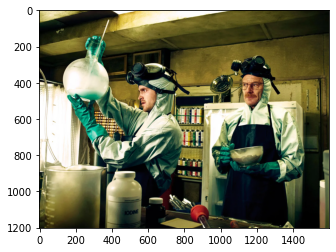

In [4]:
plt.imshow(img_1)
plt.show()

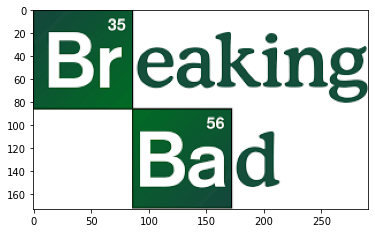

In [5]:
plt.imshow(img_2)
plt.show()

### Unir imagenes del mismo tamaño

**`cv2.addWeighted()`** nos permite "mezclar" o "unir" dos imagenes **DEL MISMO TAMAÑO** en una sola.

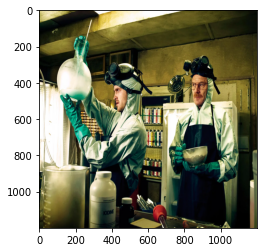

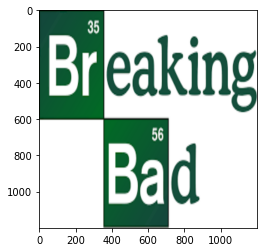

In [6]:
img_1_nuevo = cv2.resize(src = img_1, dsize = (1200, 1200))
img_2_nuevo = cv2.resize(src = img_2, dsize = (1200, 1200))

plt.imshow(img_1_nuevo)
plt.show()

plt.imshow(img_2_nuevo)
plt.show()

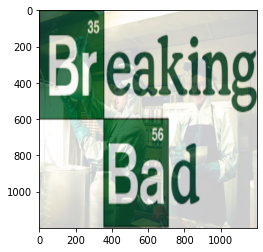

In [16]:
img_union = cv2.addWeighted(src1 = img_1_nuevo, alpha = 0.2,
                            src2 = img_2_nuevo, beta = 0.8,
                            gamma = 0)

plt.imshow(img_union)
plt.show()

In [17]:
# Si intentamos hacer lo mismo con los tamaños originales tendrémos un error.


img_union = cv2.addWeighted(src1 = img_1, alpha = 0.5,
                            src2 = img_2, beta = 0.5,
                            gamma = 0)

plt.imshow(img_union)
plt.show()

error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:661: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


### Unir imagenes de diferentes tamaños

1. **Superponer (overlay)**: modificamos el objeto **`np.array`** directamente, es decir, cambiamos lo valores que nos interesan de la imagen más grande por los valores de la imagen pequeña.

2. **Usando máscaras (mask)**: Seleccionamos una parte de la imagen más grande y aplicamos una máscara, la imagen pequeña se verá a traves de esa máscara, funciona muy parecido a un filtro.

In [18]:
# Parte 1: Superponer

# Imagen grande: img_1
# Imagen pequeña: img_2

img_1.shape, img_2.shape

((1201, 1600, 3), (173, 291, 3))

In [19]:
img_grande = img_1.copy()
img_pequeña = img_2.copy()

In [22]:
x_comienzo = 0
y_comienzo = 0

x_final = x_comienzo + img_pequeña.shape[1]
y_final = y_comienzo + img_pequeña.shape[0]

In [24]:
print(x_comienzo, y_comienzo)
print(x_final, y_final)

0 0
291 173


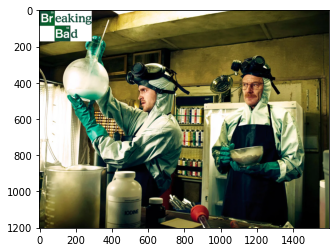

In [25]:
img_grande[y_comienzo : y_final, x_comienzo : x_final] = img_2


plt.imshow(img_grande)
plt.show()

In [32]:
img_1 = cv2.imread("../Data/imagenes/imagen_prueba_2.jpeg")
img_2 = cv2.imread("../Data/imagenes/imagen_prueba_logo.png")

img_1 = cv2.cvtColor(src = img_1, code = cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(src = img_2, code = cv2.COLOR_BGR2RGB)

img_1.shape, img_2.shape

((1201, 1600, 3), (173, 291, 3))

In [33]:
# Parte 2: Máscara

# 1er Paso: decidir donde aplicar la "mascara"

# Esquina inferior derecha

In [34]:
x_comienzo = img_grande.shape[1] - img_pequeña.shape[1]
y_comienzo = img_grande.shape[0] - img_pequeña.shape[0]

x_comienzo, y_comienzo

(1309, 1028)

In [35]:
x_final = img_grande.shape[1]
y_final = img_grande.shape[0]

x_final, y_final

(1600, 1201)

In [36]:
x_final - x_comienzo, y_final - y_comienzo

(291, 173)

In [37]:
# Seleccionamos la zona de la máscara
zona_mascara = img_1[y_comienzo : y_final, x_comienzo : x_final]

[]

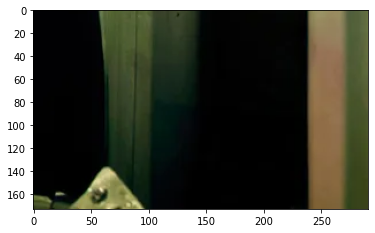

In [38]:
plt.imshow(zona_mascara)
plt.plot()

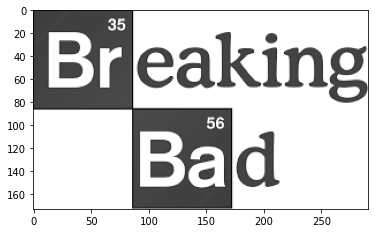

In [45]:
# Parte 2: Crear la mascara

# Primero transformamos la imagen pequeña a escala de grises

img_2_gris = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

plt.imshow(img_2_gris, cmap = "gray")
plt.show()

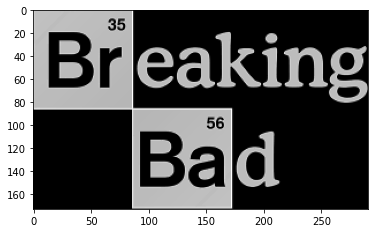

In [46]:
# Luego nos quedamos con la parte donde no hay blancos

mascara_inversa = cv2.bitwise_not(img_2_gris)

plt.imshow(mascara_inversa, cmap = "gray")
plt.show()

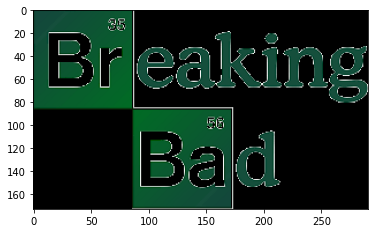

In [48]:
# Ahora tenemos la imagen en escala de grises, tenemos que "transformarla" otra vez para que tenga los colores originales

mascara_color = cv2.bitwise_or(img_2, img_2, mask = mascara_inversa)

plt.imshow(mascara_color)
plt.show()

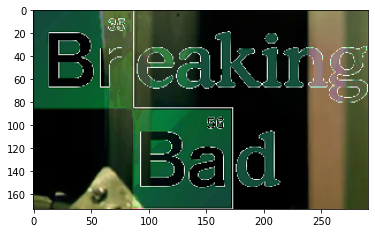

In [42]:
# Unimos

resultado = cv2.bitwise_or(zona_mascara, mascara_color)

plt.imshow(resultado)
plt.show()

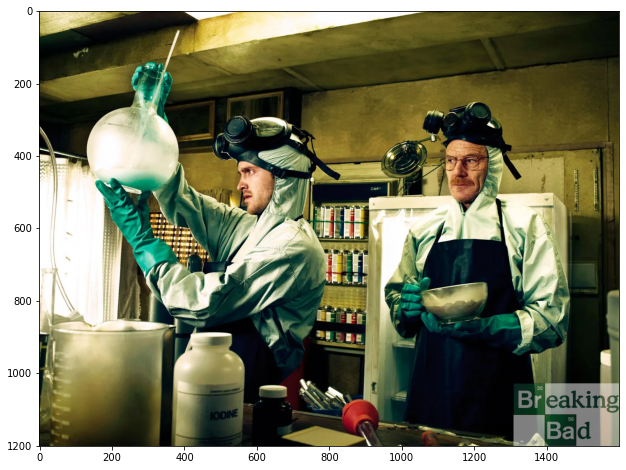

In [53]:
# Agregamos el resultado a la imagen grande

img_grande = img_1.copy()
#img_pequeña = resultado.copy()

img_grande[y_comienzo : y_final, x_comienzo : x_final] = img_grande[y_comienzo : y_final, x_comienzo : x_final] * 0.5 + img_2 * 0.5

plt.figure(figsize = (12, 8))

plt.imshow(img_grande)
plt.show()

In [44]:
################################################################################################################################

### Ejercicio:

- Usa una máscara para unir dos imagenes de diferentes tamaños.

In [136]:
img_1 = cv2.imread("../Data/imagenes/michael.jpg")
img_2 = cv2.imread("../Data/imagenes/cat.jpg")

img_1 = cv2.cvtColor(src = img_1, code = cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(src = img_2, code = cv2.COLOR_BGR2RGB)

img_1.shape, img_2.shape

((900, 2048, 3), (1068, 800, 3))

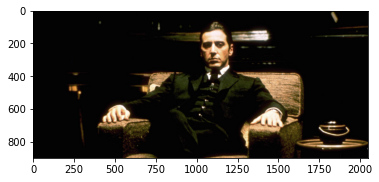

In [137]:
plt.imshow(img_1)
plt.show()

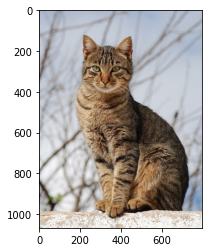

In [138]:
plt.imshow(img_2)
plt.show()

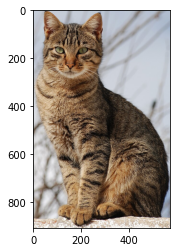

In [143]:
plt.imshow(img_2[120:-40, 170:-60, :])
plt.show()

In [144]:
img_2 = img_2[120:-40, 170:-60, :]

In [145]:
img_2.shape

(908, 570, 3)

In [146]:
908 / 570

1.592982456140351

In [153]:
img_2_nuevo = cv2.resize(src = img_2, dsize = (200, int(200 * 1.6)))

In [154]:
img_2_nuevo.shape

(320, 200, 3)

In [158]:
x_comienzo = 1400
y_comienzo = 400

x_final = x_comienzo + img_2_nuevo.shape[1]
y_final = y_comienzo + img_2_nuevo.shape[0]

In [159]:
img_grande = img_1.copy()
img_grande[y_comienzo : y_final, x_comienzo : x_final] = img_2_nuevo * 1

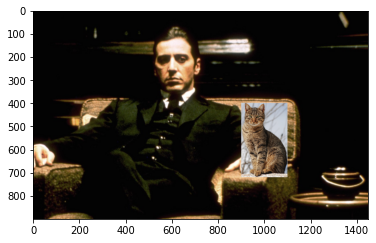

In [163]:
plt.imshow(img_grande[:, 500:-100])
plt.show()